<a href="https://colab.research.google.com/github/ShinwooChoi/ESAA/blob/main/%08Do_it_Pandas_%ED%95%84%EC%82%AC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**12-1 datetime 오브젝트**

**datetime 라이브러리:** 날짜와 시간을 처리하는 등의 다양한 기능을 제공하는 파이썬 라이브러리
- date 오브젝트: 날짜 처리
- time 오브젝트: 시간 처리
- datetime 오브젝트: 날짜와 시간을 모두 처리

In [1]:
from datetime import datetime

now, today 메서드 사용해 현재 시간 출력 가능

In [2]:
now1 = datetime.now()
print(now1)

2025-03-24 08:01:44.875420


In [3]:
now2 = datetime.today()
print(now2)

2025-03-24 08:01:44.895433


datetime 오브젝트 생성할 때 시간을 직접 입력하여 인자로 전달

In [4]:
t1= datetime.now()
t2= datetime(1970,1,1)
t3= datetime(1970,12,12,13,24,34)

print(t1)
print(t2)
print(t3)

2025-03-24 08:01:44.916652
1970-01-01 00:00:00
1970-12-12 13:24:34


datetime 오브젝트는 시간 계산 가능

In [5]:
diff1 =t1-t2
print(diff1)
print(type(diff1))

diff2=t2-t1
print(diff2)
print(type(diff2))

20171 days, 8:01:44.916652
<class 'datetime.timedelta'>
-20172 days, 15:58:15.083348
<class 'datetime.timedelta'>


##datetime 오브젝트로 변환하기 - to_datetime 메서드

 문자열은 시간 계산을 할 수 없기 때문에 datetime 오브젝트로 번환해 주어야 함

In [8]:
import pandas as pd
import os

#ebola 데이터프레임을 보면 문자열로 저장된 Date 열이 있는 것을 알 수 있음
ebola = pd.read_csv('/content/country_timeseries.csv')
print(ebola.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [93]:
#to_datetime 메서드를 사용하면 Date 열의 자료형을 datetime 오브젝트로 변환할 있음
ebola['date-dt']=pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 290 entries, 2015-01-05 to 2014-03-22
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    float64       
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria  

시간 형식 지정자(%d, %m, %y)와 기호 (/, -)를 적절히 조합하여 format 인자에 전달하면 그 형식에 맞게 정러된 datetime 오브젝트를 얻을 수 있음

In [95]:
test_df1=pd.DataFrame({'order_day':['01/01/15','02/01/15','03/01/15']})
test_df1['date_dt1']=pd.to_datetime(test_df1['order_day'],format='%d/%m/%y')
test_df1['date_dt2']=pd.to_datetime(test_df1['order_day'],format='%m/%d/%y')
test_df1['date_dt3']=pd.to_datetime(test_df1['order_day'],format='%y/%m/%d')

print(test_df1)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [11]:
test_df2=pd.DataFrame({'order_day':['01-01-15','02-01-15','03-01-15']})
test_df2['date_dt']=pd.to_datetime(test_df2['order_day'],format='%d-%m-%y')

print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


##시간 형식 지정자

###시계열 데이터 구분해서 추출

now 메서드로 얻은 현재 시간의 시계열 데이터는 정밀한 단위까지 시간을 표현.

하지만 원하는 시계열 데어터의 시간 요소가 연도,월 일 뿐이라면 now 에서드로 얻은 시계열 데어터를 잘라내야 함.


- 다음은 strftime메서드와 시간 형식 지정자를 이용하여 시계열 데이터를 잘라낸 것


In [12]:
now = datetime.now()
print(now)

2025-03-24 08:02:15.940766


In [13]:
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

2025-03-24


In [14]:
nowTime = now.strftime('%H:%M:%S')
print(nowTime)

08:02:15


In [15]:


nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)

2025-03-24 08:02:15


##datetime 오브젝트로 변환하기 - read_csv 메서드

###datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합 불러오기

In [96]:
# read_csv 메서드의 parse_dates 인자에 datetime 오브젝트로 변환하고자 하는 열의 이름을 전달하여 데이터 집합을 불러온 것
# 결과를 보면 Date 열이 문자열이 아니라 datetime 오브젝트라는 것을 확인할 수 있음
ebola1=pd.read_csv('/content/country_timeseries.csv',parse_dates=['Date'])
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

##datetime 오브젝트에서 날짜 정보 추출하기


datetime 오브젝트에는 년, 월, 일과 같은 날과 정보를 따로 저장하고 있는 속성이 준비되어 있음

In [97]:
#문자열로 저장된 날자를 시리즈에 담아 datetime 오브젝트로 변환
date_series=pd.Series(['2018-05-16','2018-05-17','2018-05-18'])
d1=pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


 datetime 오브젝트(d1)의 year, month, day 속성을 이용하면 년, 월, 일 정보를 바로 추출할 수 있음

In [18]:
print(d1[0].year)

2018


In [19]:
print(d1[0].month)

5


In [20]:
print(d1[0].day)

16


## dt 접근자 사용하기
dt 접근자률 사용하면 datetime 속성이나 메서드를 사용하여 시계열 데이터를 처리할 수 있음

###dt 접근자로 시계열 데이터 정리하기

In [99]:
#ebola 데이터 집합을 불러온 다옴 Date 열을 datetime 오브젝트로 변환하여 새로운 열로 추가
ebola=pd.read_csv('/content/country_timeseries.csv')
ebola['date_dt']=pd.to_datetime(ebola['Date'])

dt 접근자룰 사용하지 않고 인덱스가 3인 데이터의 년, 월, 일 데이터를 추출

In [100]:
print(ebola[['Date','date_dt']].head())

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31


In [23]:
print(ebola['date_dt'][3].year)

2015


In [24]:
print(ebola['date_dt'][3].month)

1


In [25]:
print(ebola['date_dt'][3].day)

2


 dt 접근자로 date_dt 열에 한 번에 접근한 다음 year 속성을 이용하여 연도값 추출

In [26]:
ebola['year']=ebola['date_dt'].dt.year
print(ebola[['Date','date_dt','year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


 월, 일 데이터를 한 번에 추출해서 새로운 열(month,day)로 추가

In [27]:
ebola['month']=ebola['date_dt'].dt.month
print(ebola[['Date','date_dt','year','month']].head())

         Date    date_dt  year  month
0    1/5/2015 2015-01-05  2015      1
1    1/4/2015 2015-01-04  2015      1
2    1/3/2015 2015-01-03  2015      1
3    1/2/2015 2015-01-02  2015      1
4  12/31/2014 2014-12-31  2014     12


In [101]:
#ebola 데이터프레임에 새로 추가한 date_dt, year,month,day열의 자료형을 출력한 것
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

##12-2 사례별 시계열 데이터 계산하기

###에볼라 최초 발병일 계산하기

In [102]:
#ebola 데이터프레임은 데이터가 시간 역순으로 정렬되어 있음.
#시간 순으로 데이터를 살펴보려면 데이터프레임의 마지막부터 살펴봐야 함.

print(ebola.iloc[-5:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


In [103]:
#min메서드 사용해 에볼라의 최초 발병일 찾기
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [104]:
#에볼라의 진행 정도= Date 열에서 에볼라의 최초 발병일을 뺀 것
ebola['outbreak_d']=ebola['date_dt']-ebola['date_dt'].min()
print(ebola[['Date','Day','date_dt','outbreak_d']].head())

         Date  Day    date_dt outbreak_d
0    1/5/2015  289 2015-01-05   289 days
1    1/4/2015  288 2015-01-04   288 days
2    1/3/2015  287 2015-01-03   287 days
3    1/2/2015  286 2015-01-02   286 days
4  12/31/2014  284 2014-12-31   284 days


###파산한 은행의 개수 계산하기

In [107]:
#banks 데이터프레임의 앞부분을 살펴보면 Closing Date, Updated Date 열의 데이터 자료형이 시계열 데이터라는 것을 확인 가능
banks=pd.read_csv('/content/banklist.csv')
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank    15-Dec-17    20-Dec-17  
1                          Conway Bank    13-Oct-17    20-Oct-17  
2            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
3  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
4                         Whitney Bank    28-Apr-17     5-Dec-17  


Closing Date, Updated Date 열의 데이터 자료형은 문자열.

 - 다음은 read_csv 메서드의 parse_dates 속성을 이용하여 문자열로 저장된 두 열을 datetime 오브젝트로 변환하여 불러온 것

In [108]:
banks_no_dates=pd.read_csv('/content/banklist.csv')
print(banks_no_dates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB
None


In [109]:
banks=pd.read_csv('/content/banklist.csv',parse_dates=[5,6])
print(banks.info)

<bound method DataFrame.info of                                              Bank Name         City  ST  \
0                  Washington Federal Bank for Savings      Chicago  IL   
1      The Farmers and Merchants State Bank of Argonia      Argonia  KS   
2                                  Fayette County Bank   Saint Elmo  IL   
3    Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI   
4                                       First NBC Bank  New Orleans  LA   
..                                                 ...          ...  ..   
550                                 Superior Bank, FSB     Hinsdale  IL   
551                                Malta National Bank        Malta  OH   
552                    First Alliance Bank & Trust Co.   Manchester  NH   
553                  National State Bank of Metropolis   Metropolis  IL   
554                                   Bank of Honolulu     Honolulu  HI   

      CERT                Acquiring Institution Closing Date Update

<ipython-input-109-e12adaf1297a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks=pd.read_csv('/content/banklist.csv',parse_dates=[5,6])
<ipython-input-109-e12adaf1297a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks=pd.read_csv('/content/banklist.csv',parse_dates=[5,6])


In [110]:
#은행이 파산한 연도, 분기를 새로운 열로 추가
banks['closing_quarter'],banks['Closing_year']=(banks['Closing Date'].dt.quarter,banks['Closing Date'].dt.year)

print(banks.head())


                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  \
0                   Royal Savings Bank   2017-12-15   2017-12-20   
1                          Conway Bank   2017-10-13   2017-10-20   
2            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
3  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
4                         Whitney Bank   2017-04-28   2017-12-05   

   closing_quarter  Closing_year  
0                4          2017  
1                4          2017  
2    

In [111]:
# grouby 메서드를 사용해 연도별로 파산한 은행 개수 구하기
closing_year=banks.groupby(['Closing_year']).size()
print(closing_year)

Closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


In [40]:
#각 연도별, 분기별로 파산한 은행의 개수
closing_year_q=banks.groupby(['Closing_year','closing_quarter']).size()
print(closing_year_q)

Closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

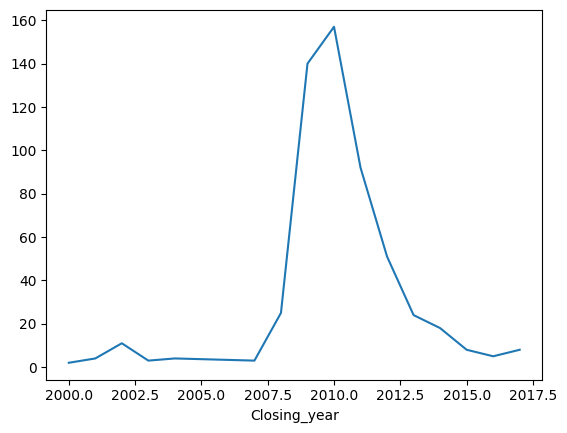

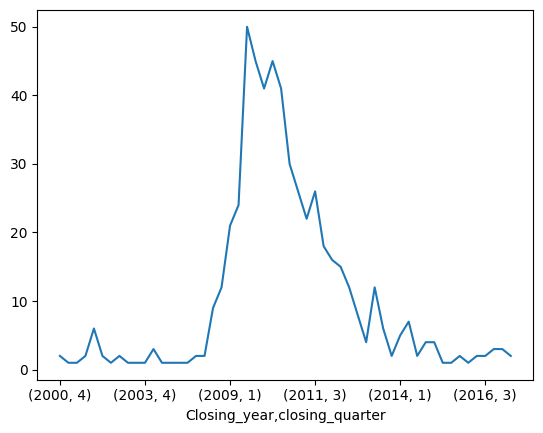

In [42]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax=closing_year.plot()
plt.show()

fig,ax=plt.subplots()
ax=closing_year_q.plot()
plt.show()

###테슬라 주식 데이터로 시간 계산하기

In [43]:
pip install pandas-datareader

In [44]:
pd.core.common.is_list_like=pd.api.types.is_list_like
import pandas_datareader as pdr

In [53]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr

tesla = pd.read_csv('/content/tesla_stock_quandl.csv', parse_dates=[0])

In [54]:
print(tesla.loc[(tesla.Date.dt.year == 2010) & (tesla.Date.dt.month == 6)])

           Date   Open     High    Low  Close      Volume  ExDividend  \
1947 2010-06-30  25.79  30.4192  23.30  23.83  17187100.0         0.0   
1948 2010-06-29  19.00  25.0000  17.54  23.89  18766300.0         0.0   

      SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
1947         1.0    25.79  30.4192   23.30     23.83  17187100.0  
1948         1.0    19.00  25.0000   17.54     23.89  18766300.0  


##datetime 오브젝트와 인덱스 - DatetimeIndex

###datetime 오브젝트를 인덱스로 설정해 데이터 추출하기

In [55]:
tesla.index = tesla['Date']
print(tesla.index)

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21', '2018-03-20', '2018-03-19', '2018-03-16',
               '2018-03-15', '2018-03-14',
               ...
               '2010-07-13', '2010-07-12', '2010-07-09', '2010-07-08',
               '2010-07-07', '2010-07-06', '2010-07-02', '2010-07-01',
               '2010-06-30', '2010-06-29'],
              dtype='datetime64[ns]', name='Date', length=1949, freq=None)


In [56]:
print(tesla.loc['2015'].iloc[:5, :5])

                 Date    Open     High       Low   Close
Date                                                    
2015-12-31 2015-12-31  238.51  243.450  238.3700  240.01
2015-12-30 2015-12-30  236.60  243.634  235.6707  238.09
2015-12-29 2015-12-29  230.06  237.720  229.5470  237.19
2015-12-28 2015-12-28  231.49  231.980  225.5400  228.95
2015-12-24 2015-12-24  230.56  231.880  228.2800  230.57


In [57]:
print(tesla.loc['2010-06'].iloc[:,:5])

                 Date   Open     High    Low  Close
Date                                               
2010-06-30 2010-06-30  25.79  30.4192  23.30  23.83
2010-06-29 2010-06-29  19.00  25.0000  17.54  23.89


##시간 간격과 인덱스 - TimedeltaIndex

###시간 간격을 인덱스로 지정해 데이터 추출하기

In [58]:
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()
print(tesla.head())

                 Date    Open    High     Low   Close      Volume  ExDividend  \
Date                                                                            
2018-03-27 2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
2018-03-26 2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2018-03-23 2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
2018-03-22 2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
2018-03-21 2018-03-21  310.25  322.44  310.19  316.53   5927881.0         0.0   

            SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  \
Date                                                                     
2018-03-27         1.0   304.00   304.27  277.18    279.18  13696168.0   
2018-03-26         1.0   307.34   307.59  291.36    304.18   8324639.0   
2018-03-23         1.0   311.25   311.61  300.45    301.54   6600538.0   
2018-03-22         1.0   313.89   318.82  308.18    309.10   4

In [64]:
# ref_date 열을 인덱스로 지정했으므로 시간 간격(ref_date)을 이용하여 데이터를 추출할 수 있음.
tesla.index = tesla['ref_date']
print(tesla.iloc[:5,:5])

                Date    Open    High     Low   Close
ref_date                                            
2828 days 2018-03-27  304.00  304.27  277.18  279.18
2827 days 2018-03-26  307.34  307.59  291.36  304.18
2824 days 2018-03-23  311.25  311.61  300.45  301.54
2823 days 2018-03-22  313.89  318.82  308.18  309.10
2822 days 2018-03-21  310.25  322.44  310.19  316.53


In [65]:
print(tesla['5 days':].iloc[:5,:5])

               Date   Open     High    Low  Close
ref_date                                         
3 days   2010-07-02  23.00  23.1000  18.71  19.20
2 days   2010-07-01  25.00  25.9200  20.27  21.96
1 days   2010-06-30  25.79  30.4192  23.30  23.83
0 days   2010-06-29  19.00  25.0000  17.54  23.89


##시간 범위와 인덱스

###시간 범위 생성해 인덱스로 지정하기

In [67]:
ebola = pd.read_csv('/content/country_timeseries.csv', parse_dates=[0])
print(ebola.iloc[:5, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [68]:
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [69]:
# date_range 메서드를 사용하여 2014년 12월 31일부터 2015년 01월 05일 사이의 시간 인덱스(DatetimeIndex)를 생성
head_range = pd.date_range(start = '2014-12-31', end='2015-01-05')
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


In [70]:
ebola_5 = ebola.head()
ebola_5.index = ebola_5['Date']
ebola_5.reindex(head_range)
print(ebola_5.iloc[:5, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


##시간 범위 수정하고 데이터 밀어내기 - shift메서드

###에볼라의 확산 속도 비교하기

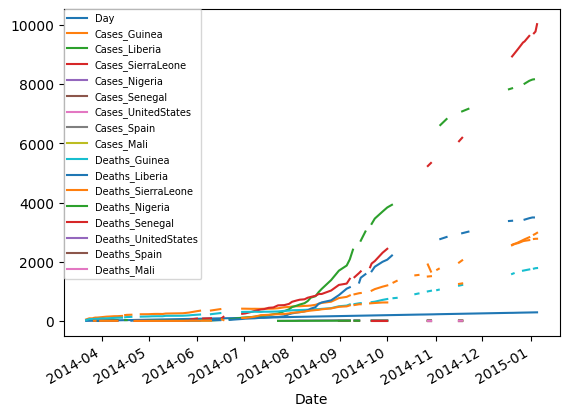

In [71]:
import matplotlib.pyplot as plt

ebola.index = ebola['Date']

fig, ax = plt.subplots()
ax = ebola.iloc[0:, 1:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()

In [72]:
ebola_sub = ebola[['Day', 'Cases_Guinea', 'Cases_Liberia']]
print(ebola_sub.tail(10))

            Day  Cases_Guinea  Cases_Liberia
Date                                        
2014-04-04   13         143.0           18.0
2014-04-01   10         127.0            8.0
2014-03-31    9         122.0            8.0
2014-03-29    7         112.0            7.0
2014-03-28    6         112.0            3.0
2014-03-27    5         103.0            8.0
2014-03-26    4          86.0            NaN
2014-03-25    3          86.0            NaN
2014-03-24    2          86.0            NaN
2014-03-22    0          49.0            NaN


In [73]:
ebola = pd.read_csv('/content/country_timeseries.csv', parse_dates = [0])
print(ebola.head().iloc[:, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [74]:
print(ebola.tail().iloc[:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [75]:
ebola.index = ebola['Date']
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())

In [76]:
print(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [77]:
new_idx = reversed(new_idx)

In [78]:
ebola = ebola.reindex(new_idx)

print(ebola.head().iloc[:, :5])

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN


In [80]:
print(ebola.tail().iloc[:, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-26 2014-03-26  4.0          86.0            NaN                NaN
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN
2014-03-24 2014-03-24  2.0          86.0            NaN                NaN
2014-03-23        NaT  NaN           NaN            NaN                NaN
2014-03-22 2014-03-22  0.0          49.0            NaN                NaN


In [81]:
# 각각의 메서드는 유효한 값이 있는 첫 번째와 마지막 인덱스를 반환함.
last_valid = ebola.apply(pd.Series.last_valid_index)
print(last_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]


In [82]:
first_valid = ebola.apply(pd.Series.first_valid_index)
print(first_valid)

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]


In [84]:
# 각 나라의 에볼라 발병일을 동일한 출발선으로 옮기려면 에볼라가 가장 처음 발병한 날(earliest_date)에서 각 나라의 에볼라 발병일을 뺀 만큼(shift_values)만 옮기면 됨.
earliest_date = ebola.index.min()
print(earliest_date)

2014-03-22 00:00:00


In [85]:
shift_values = last_valid - earliest_date
print(shift_values)

Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


In [86]:
ebola_dict = {}
for idx, col in enumerate(ebola):
  d = shift_values[idx].days
  shifted = ebola[col].shift(d)
  ebola_dict[col] = shifted

<ipython-input-86-a7363186ba3f>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d = shift_values[idx].days


In [87]:
ebola_shift = pd.DataFrame(ebola_dict)

In [89]:
print(ebola_shift.tail())

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                         
2014-03-26 2014-03-26  4.0          86.0            8.0                2.0   
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN   
2014-03-24 2014-03-24  2.0          86.0            7.0                NaN   
2014-03-23        NaT  NaN           NaN            3.0                2.0   
2014-03-22 2014-03-22  0.0          49.0            8.0                6.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2014-03-26            1.0            NaN                 1.0          1.0   
2014-03-25            NaN            NaN                 NaN          NaN   
2014-03-24            NaN            NaN                 NaN          NaN   
2014-03-23            NaN            NaN                 NaN        

In [90]:
ebola_shift.index = ebola_shift['Day']
ebola_shift = ebola_shift.drop(['Date', 'Day'], axis=1)

print(ebola_shift.tail())

     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Day                                                                  
4.0          86.0            8.0                2.0            1.0   
3.0          86.0            NaN                NaN            NaN   
2.0          86.0            7.0                NaN            NaN   
NaN           NaN            3.0                2.0            NaN   
0.0          49.0            8.0                6.0            0.0   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Day                                                               
4.0            NaN                 1.0          1.0         NaN   
3.0            NaN                 NaN          NaN         NaN   
2.0            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   
0.0            1.0                 1.0          1.0         1.0   

     Deaths_Guinea  Deaths_Liberia  Dea

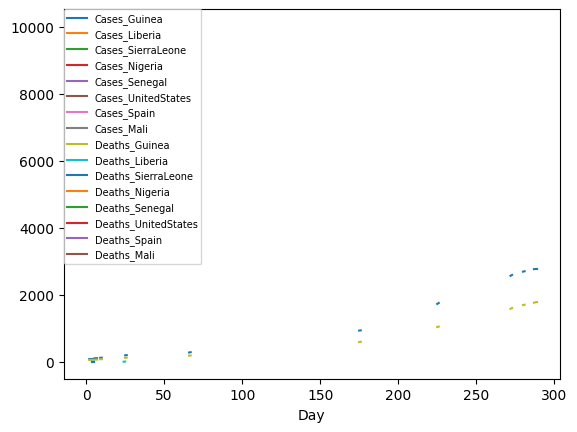

In [91]:
fig, ax = plt.subplots()
ax = ebola_shift.iloc[:, :].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()